<a href="https://colab.research.google.com/github/rahule-1999/M.Sc-Project/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def signal_fn(t,A,w,phi):
  return A*np.sin((w*t)+phi)

def noise_fn(std,n):
  return np.random.normal(0,std,n)

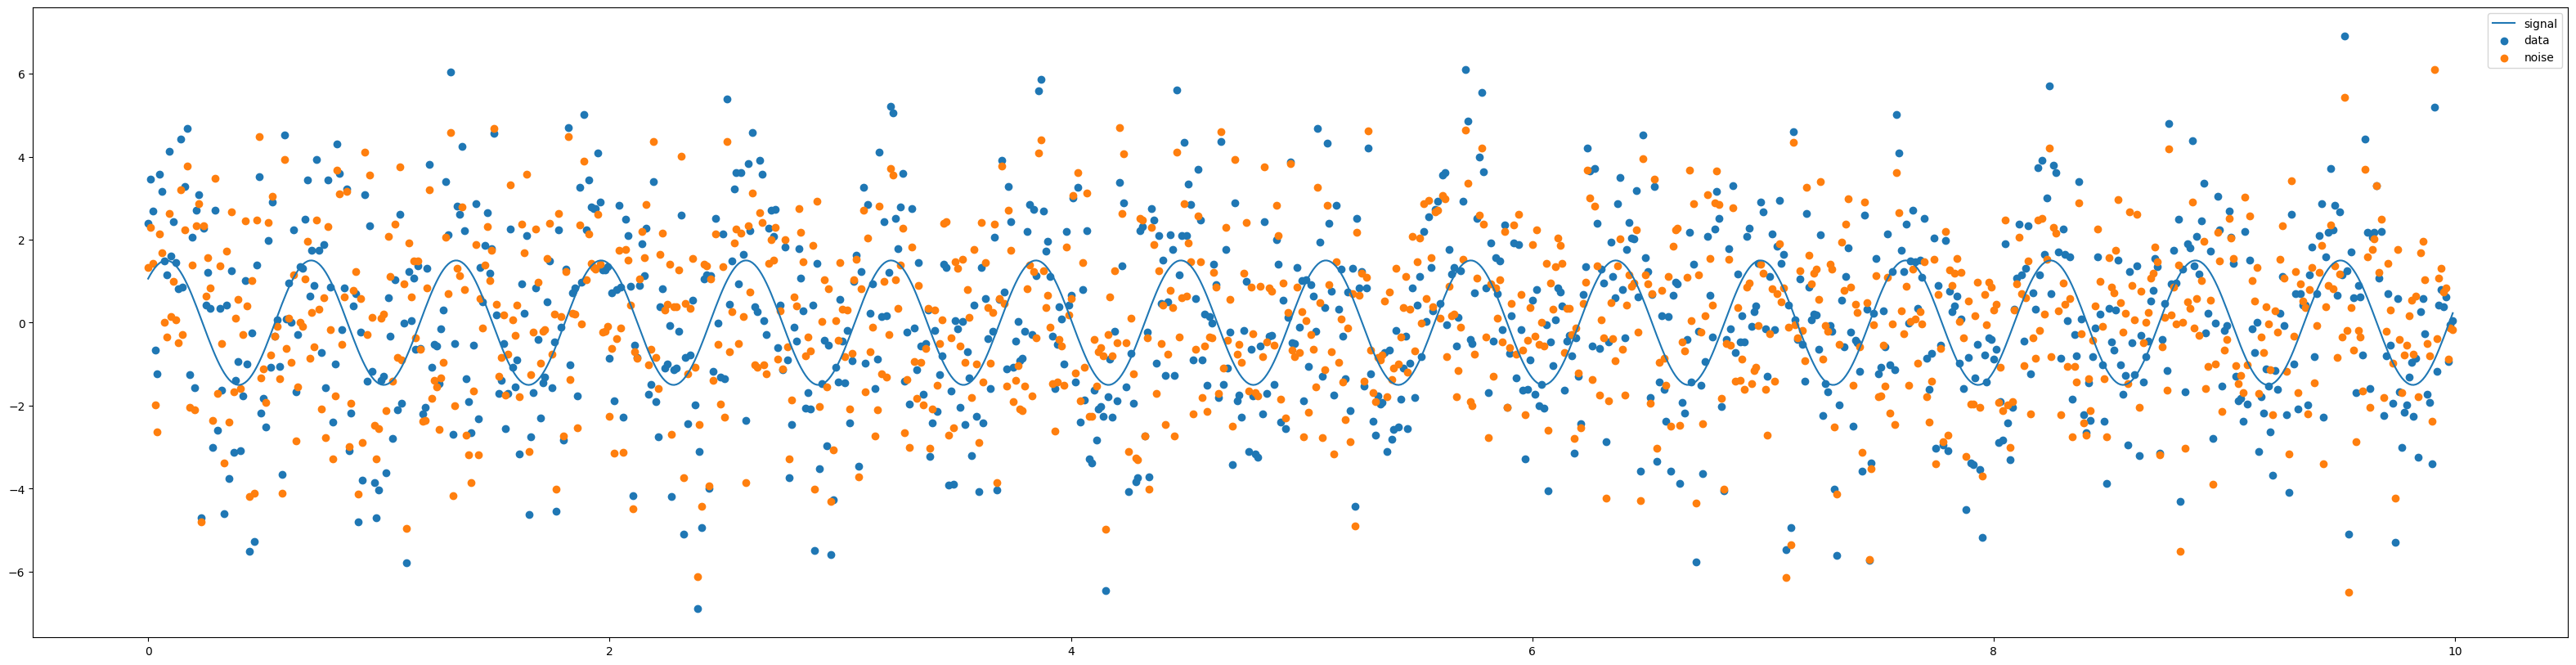

In [8]:
t = np.arange(0,10,0.01)

true_A = 1.5
true_w = 10
true_phi = np.pi/4
std = 2

sig = signal_fn(t,true_A,true_w,true_phi)
noise = noise_fn(std,len(t))
data = sig + noise

plt.figure(figsize=(40, 10))
plt.plot(t,sig,label='signal')
plt.scatter(t,data,label='data')
plt.scatter(t,noise,label='noise')
plt.legend(loc='best')

[[10.485934519919995, -2429.326010565022],
 [10.509200551644925, -2425.798494785732],
 [9.551511079679955, -2425.509698036628],
 [9.545998907139097, -2425.303831047847],
 [9.581725141573221, -2423.2834409709617],
 [10.413006190193862, -2421.9535588635094],
 [10.525802071194544, -2421.91777970415],
 [11.07810068782285, -2421.1598383750907],
 [9.594625747879421, -2420.500236409132],
 [9.512051501532786, -2420.3787438626287],
 [11.104819371753479, -2419.6904719669838],
 [9.601998285060276, -2418.397246992804],
 [10.539084844627133, -2418.1342510311592],
 [11.122837350771276, -2417.482495360171],
 [9.497841589351362, -2416.6957742655077],
 [11.016380725794384, -2416.5646283032283],
 [10.544701643551878, -2416.3799067271484],
 [10.545450091789935, -2416.1399060849944],
 [9.494102063999796, -2415.5932859980935],
 [10.99842281656403, -2413.3839725446337],
 [11.1568074436201, -2410.8188990976328],
 [9.473438323173845, -2408.655483390296],
 [9.470513710329612, -2407.573249687123],
 [10.57052304

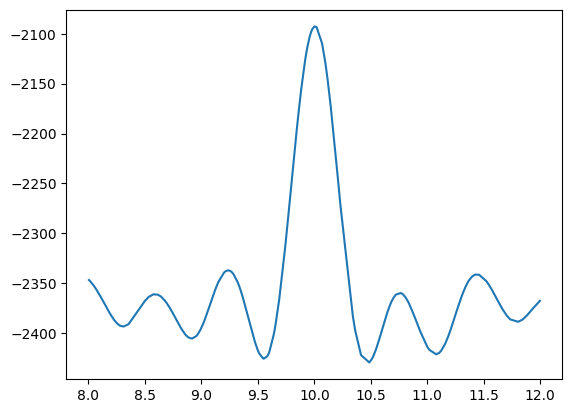

In [9]:
def ln_likelihood(t,true_A,w,true_phi,std,data):
  signal_data = signal_fn(t,true_A,w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_w(w_range,n):
  return np.random.uniform(w_range[0],w_range[1],n)

w_range = [8,12]
w_iter = get_prior_w(w_range,200)

w_and_likes = []

for i in w_iter:
  w_and_likes.append([i,ln_likelihood(t,true_A,i,true_phi,std,data)])

sorted_w_and_likes = sorted(w_and_likes,key=lambda x: x[0])
x=[x[0] for x in sorted_w_and_likes]
y=[x[1] for x in sorted_w_and_likes]
plt.plot(x,y)

sorted_w_and_likes = sorted(w_and_likes,key=lambda x: x[1])
sorted_w_and_likes

In [10]:
N_iter = 4000
i=0

w_Nsample=[]

while(i<N_iter):
  w_sample = get_prior_w(w_range,1)
  ln_likes_sample = ln_likelihood(t,true_A,w_sample,true_phi,std,data)

  if ln_likes_sample > sorted_w_and_likes[0][1]:
    w_Nsample.append(sorted_w_and_likes.pop(0))
    sorted_w_and_likes.append([w_sample[0],ln_likes_sample])
    sorted_w_and_likes = sorted(sorted_w_and_likes,key=lambda x: x[1])

  i+=1

w_Nsample = sorted(w_Nsample,key=lambda x: x[1])
w_Nsample
# x=[x[0] for x in w_Nsample]
# y=[x[1] for x in w_Nsample]
# plt.plot(x,y)

[[10.485934519919995, -2429.326010565022],
 [10.509200551644925, -2425.798494785732],
 [9.551511079679955, -2425.509698036628],
 [9.545998907139097, -2425.303831047847],
 [9.581725141573221, -2423.2834409709617],
 [10.413006190193862, -2421.9535588635094],
 [10.525802071194544, -2421.91777970415],
 [11.07810068782285, -2421.1598383750907],
 [9.594625747879421, -2420.500236409132],
 [9.512051501532786, -2420.3787438626287],
 [11.104819371753479, -2419.6904719669838],
 [9.601998285060276, -2418.397246992804],
 [10.539084844627133, -2418.1342510311592],
 [11.122837350771276, -2417.482495360171],
 [9.497841589351362, -2416.6957742655077],
 [11.016380725794384, -2416.5646283032283],
 [10.544701643551878, -2416.3799067271484],
 [10.545450091789935, -2416.1399060849944],
 [9.494102063999796, -2415.5932859980935],
 [10.99842281656403, -2413.3839725446337],
 [11.1568074436201, -2410.8188990976328],
 [9.473438323173845, -2408.655483390296],
 [9.470513710329612, -2407.573249687123],
 [10.57052304